<a href="https://colab.research.google.com/github/wang201156/ycps0218/blob/main/%E4%BD%9C%E6%A5%AD03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# HW03 Data Analysis

## 標題：新婚人數與教育程度分析報告

## 摘要

本報告基於內政部的婚姻狀況統計資料，探討新郎與新娘在不同年齡區間的教育程度分佈情形。透過資料清理與視覺化，繪製圖表，比較性別之間的教育背景差異，進一步觀察是否存在特定年齡層偏好的教育程度結構。本報告提供對婚姻年齡與教育背景之間關係的初步洞察，並有助於人口統計領域之應用。

## 引言

### 背景
在社會與人口結構的研究中，婚姻年齡與教育程度是兩項重要的分析變數。了解新婚男女在各年齡區間的教育程度分佈，不僅可以揭示婚姻市場的趨勢與變化，也能反映出教育與婚姻之間潛在的交互關係。

### 目的
本研究旨在視覺化並比較新郎與新娘在各年齡區間的教育程度構成，呈現不同教育背景的分佈情況，從而提供更全面的婚姻結構理解。
### 待答問題
1.在不同年齡區間，新郎與新娘的教育程度分佈是否相似？   
2.哪些年齡區間的結婚人數最多？   
3.教育程度是否與婚齡存在明顯的趨勢關係（例如高學歷者偏向晚婚）？  


## 方法

### 數據來源
本研究使用的數據來自內政部人口統計中的**初婚人數-按國籍年齡教育程度(2023年)**，
其中包括新郎與新娘的初婚年齡區間及其對應的教育程度人數統計。

### 分析工具
- **Python**（數據處理與分析）
- **Pandas**（數據清理與統計分析）
- **Matplotlib / Seaborn**（數據視覺化）

### 數據處理
擷取新郎與新娘資料，整理欄位與教育分類。

移除「總計」與空值行，避免干擾分佈。

將教育程度數據轉為數值型態以利後續計算與繪圖。


In [ ]:
!pip install pandas openpyxl
!pip install odfpy
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

!wget -O taipei_sans_tc_beta.ttf https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_&export=download
import matplotlib.font_manager

# 新增字體
matplotlib.font_manager.fontManager.addfont('taipei_sans_tc_beta.ttf')
# 設定中文字型及負號正確顯示
plt.rcParams['font.sans-serif'] = 'Taipei Sans TC Beta'
plt.rcParams["axes.unicode_minus"] = False

In [22]:
#讀取
df_raw = pd.read_excel('/content/ps01-21.ods', engine='odf', skiprows=4)


# 取新郎部分的資料
columns = ['年齡區間', '合計', '博士畢業', '碩士畢業', '大學畢業', '專科畢業', '高中畢業', '初中畢業', '國小畢業以下']
df_groom = df_raw.iloc[:, 0:9]
df_groom.columns = columns

# 去除 "總計" 與空值行，將空值變為0
df_groom = df_groom[~df_groom['年齡區間'].str.contains('總|未滿', na=False)]
# 去除第 13 到第 18 行
df_groom = df_groom.drop(index=[13, 14, 15, 16, 17, 18])
# 將數據中的空值填充為 0
df_groom.fillna(0, inplace=True)
# 將數據轉換為整數
for col in columns[1:]:
    df_groom[col] = pd.to_numeric(df_groom[col], errors='coerce')


# 擷取新娘資料欄位（欄位索引從第 9 欄開始）
df_bride = pd.concat([
    df_raw.iloc[:, [0]],   # 年齡區間
    df_raw.iloc[:, 9:17]   # 新娘的8個教育程度分類
], axis=1)
df_bride.columns = columns

df_bride = df_bride[~df_bride['年齡區間'].str.contains('總|未滿', na=False)]
df_bride = df_bride.drop(index=[13, 14, 15, 16, 17, 18])
df_bride.fillna(0, inplace=True)
for col in columns[1:]:
    df_bride[col] = pd.to_numeric(df_bride[col], errors='coerce')


#以新郎數據展示
df_groom

,年齡區間,合計,博士畢業,碩士畢業,大學畢業,專科畢業,高中畢業,初中畢業,國小畢業以下
2,15 - 19 歲,676.0,0.0,0.0,0.0,0.0,151.0,517.0,8.0
3,20 - 24 歲,7240.0,0.0,33.0,1058.0,198.0,3663.0,2238.0,50.0
4,25 - 29 歲,28437.0,65.0,2927.0,14270.0,1197.0,7751.0,2146.0,81.0
5,30 - 34 歲,35239.0,294.0,6921.0,19040.0,1061.0,6289.0,1533.0,101.0
6,35 - 39 歲,17883.0,283.0,3585.0,8399.0,878.0,3444.0,1163.0,131.0
7,40 - 44 歲,8024.0,159.0,1140.0,2910.0,862.0,2150.0,719.0,84.0
8,45 - 49 歲,2870.0,53.0,301.0,813.0,457.0,822.0,366.0,58.0
9,50 - 54 歲,1194.0,25.0,131.0,304.0,154.0,347.0,196.0,37.0
10,55 - 59 歲,615.0,15.0,48.0,134.0,85.0,177.0,124.0,32.0
11,60 - 64 歲,294.0,7.0,21.0,65.0,19.0,94.0,68.0,20.0


## 結果與分析

年齡結構分布

<ipython-input-29-cbe6c6bf750b>:17: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(


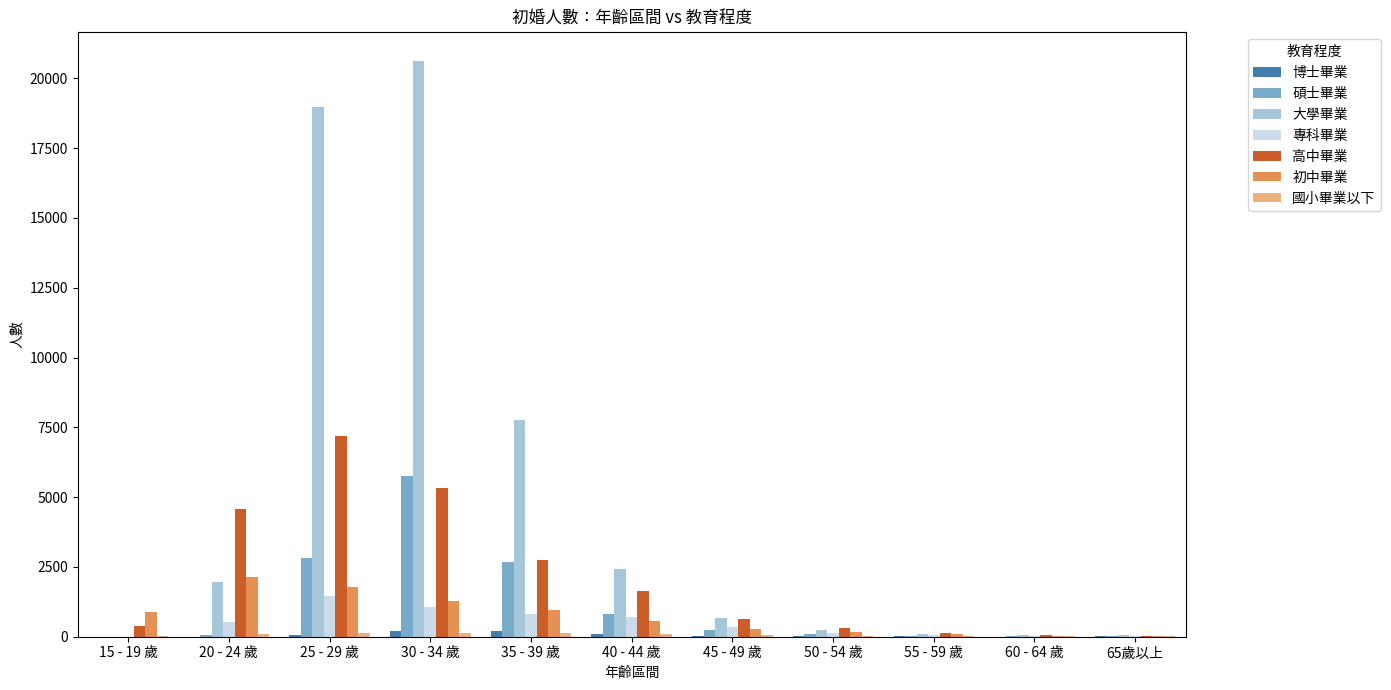

In [29]:
# 加上性別欄位
df_groom['性別'] = '新郎'
df_bride['性別'] = '新娘'

# 合併資料
df_combined = pd.concat([df_groom, df_bride], ignore_index=True)

# 轉換為長格式
df_melted = df_combined.melt(
    id_vars=['年齡區間', '性別'],
    value_vars=columns[2:],  # 各教育程度
    var_name='教育程度',
    value_name='人數'
)

plt.figure(figsize=(14, 7))
sns.barplot(
    data=df_melted,
    x='年齡區間',
    y='人數',
    hue='教育程度',
    ci=None,
    palette='tab20c',
    dodge=True
)
plt.title('初婚人數：年齡區間 vs 教育程度')
plt.xlabel('年齡區間')
plt.ylabel('人數')
plt.legend(title='教育程度', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

**分析結果**：教育程度越高，結婚年齡有明顯後移的趨勢。

博士、碩士畢業者主要集中在 30-34歲與35-39歲。

大學、專科畢業者主要集中在 25-34歲。

高中以下教育程度者則較多在 20-29歲結婚，甚至可見於 15-19歲區間。

### 不同性別的年人數和年齡分布
使用推疊長條圖進行分析。

/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)


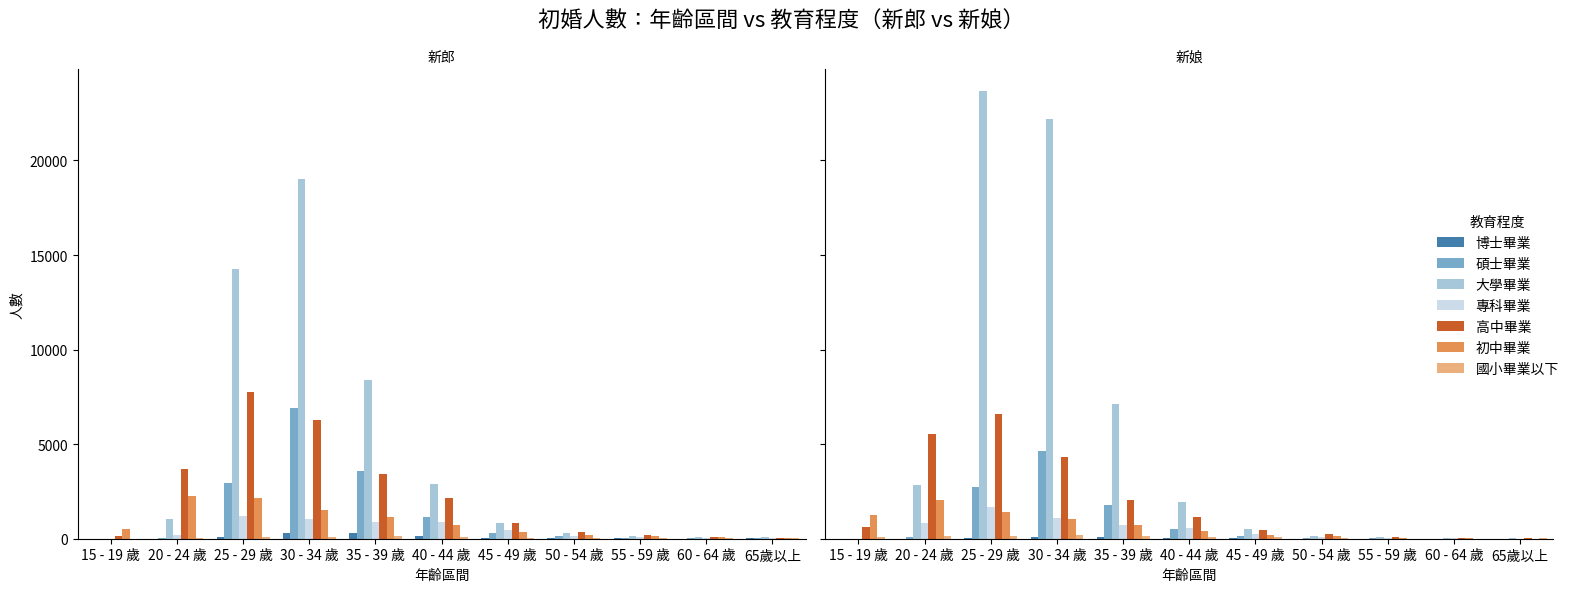

In [42]:
g = sns.FacetGrid(df_melted, col="性別", height=6, aspect=1.2)
g.map_dataframe(
    sns.barplot,
    x="年齡區間",
    y="人數",
    hue="教育程度",
    palette="tab20c",
    ci=None,
    dodge=True
)
g.add_legend(title='教育程度')
g.set_titles("{col_name}")
g.set_axis_labels("年齡區間", "人數")
plt.suptitle("初婚人數：年齡區間 vs 教育程度（新郎 vs 新娘）", fontsize=16)
plt.tight_layout()
plt.subplots_adjust(top=0.88)
plt.show()

**分析結果**：
- 新郎中：

  大學畢業者佔多數，尤其在30-34歲年齡段形成明顯的高峰。

  碩士與博士人數也顯著出現在30-39歲段。

- 新娘中：

  大學畢業者也最多，但集中在25-29歲。

  高中及以下學歷的比例較新郎來得高。

  碩博士比例相較新郎則明顯較低。
- 高齡結婚現象
  新郎在35-44歲仍有不少初婚者，顯示男性較女性更常晚婚。

  新娘在35歲以後的初婚人數顯著下降。


## 結論與建議


### 結論
1. 結果呈現出「學歷越高 → 結婚年齡越晚」的趨勢，而學歷較低者則傾向於早婚，但整體人數在高年齡層急速下降。
2. 女性初婚年齡集中於25-29歲，多為大學學歷，但碩博士比例明顯低於男性。
3. 新郎普遍比新娘晚婚，學歷越高延後結婚的趨勢越明顯。